In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

Loading the data

In [11]:
data = pd.read_csv('/content/Churn_Modelling.csv')
print(data.head())
print(data.isnull().sum())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Encoding categorical variables

In [12]:
label_encoders = {}
for column in ['Geography', 'Gender']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

Splitting the data into training and testing sets

In [13]:
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardizing the features

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initializing and training the models

In [15]:
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Making predictions

In [16]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)

Defining evaluate_model function which evaluates each model using their accuracy score, precision score, recall score, f1 score, roc auc score

In [17]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, auc

log_reg_results = evaluate_model(y_test, y_pred_log_reg)
print(f'Logistic Regression - Accuracy: {log_reg_results[0]}, Precision: {log_reg_results[1]}, Recall: {log_reg_results[2]}, F1-score: {log_reg_results[3]}, AUC-ROC: {log_reg_results[4]}')

rf_results = evaluate_model(y_test, y_pred_rf)
print(f'Random Forest - Accuracy: {rf_results[0]}, Precision: {rf_results[1]}, Recall: {rf_results[2]}, F1-score: {rf_results[3]}, AUC-ROC: {rf_results[4]}')

gb_results = evaluate_model(y_test, y_pred_gb)
print(f'Gradient Boosting - Accuracy: {gb_results[0]}, Precision: {gb_results[1]}, Recall: {gb_results[2]}, F1-score: {gb_results[3]}, AUC-ROC: {gb_results[4]}')


Logistic Regression - Accuracy: 0.815, Precision: 0.5966386554621849, Recall: 0.1806615776081425, F1-score: 0.27734375, AUC-ROC: 0.5753961279453282
Random Forest - Accuracy: 0.8645, Precision: 0.7479674796747967, Recall: 0.4681933842239186, F1-score: 0.5758998435054773, AUC-ROC: 0.7148060885027495
Gradient Boosting - Accuracy: 0.8655, Precision: 0.7540983606557377, Recall: 0.4681933842239186, F1-score: 0.5777080062794349, AUC-ROC: 0.7154283660385305


Plotting the evaluation metrics of each model using matplotlib.pyplot library

In [27]:
labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [log_reg_results[0], rf_results[0], gb_results[0]]
precision = [log_reg_results[1], rf_results[1], gb_results[1]]
recall = [log_reg_results[2], rf_results[2], gb_results[2]]
f1 = [log_reg_results[3], rf_results[3], gb_results[3]]
auc = [log_reg_results[4], rf_results[4], gb_results[4]]

x = range(len(labels))

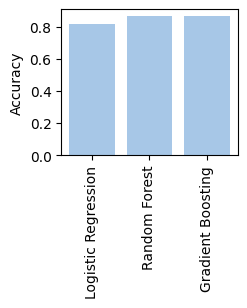

In [34]:
plt.subplot(2, 3, 1)
plt.bar(x, accuracy, color='#A7C7E7')
plt.xticks(x, labels, rotation='vertical')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

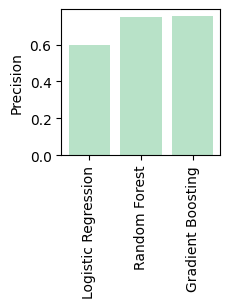

In [35]:
plt.subplot(2, 3, 2)
plt.bar(x, precision, color='#B8E2C8')
plt.xticks(x, labels, rotation='vertical')
plt.ylabel('Precision')
plt.tight_layout()
plt.show()

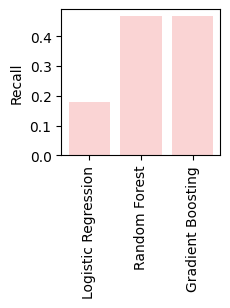

In [36]:
plt.subplot(2, 3, 3)
plt.bar(x, recall, color='#FAD4D4')
plt.xticks(x, labels, rotation='vertical')
plt.ylabel('Recall')
plt.tight_layout()
plt.show()

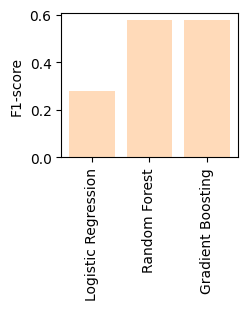

In [37]:
plt.subplot(2, 3, 4)
plt.bar(x, f1, color='#FFDAB9')
plt.xticks(x, labels, rotation='vertical')
plt.ylabel('F1-score')
plt.tight_layout()
plt.show()

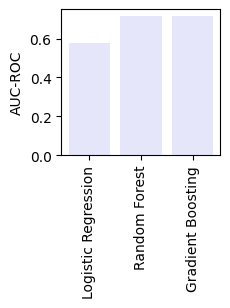

In [38]:
plt.subplot(2, 3, 5)
plt.bar(x, auc, color='#E6E6FA')
plt.xticks(x, labels, rotation='vertical')
plt.ylabel('AUC-ROC')
plt.tight_layout()
plt.show()